In [17]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tqdm import tqdm
import pandas as pd
from sklearn.model_selection import train_test_split

In [18]:
df_train = pd.read_csv('../input/train.csv')
df_test = pd.read_csv('../input/test.csv')

X_train = df_train.iloc[:,1:].values # selects columns 1 to end as first(index=0) column is of labels
y_train = df_train.iloc[:,:1].values # selects first column(0 is first and 1 is second)

train_X, valid_X, train_y, valid_y = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

# One-hot conversion for training data
m_train = train_y.shape[0]
train_y_mat = np.zeros((m_train, 10))
for i in range(0,m_train):
    train_y_mat[i, train_y[i]] = 1
# One-hot conversion for validation data
m_valid = valid_y.shape[0]
valid_y_mat = np.zeros((m_valid, 10))
for i in range(0,m_valid):
    valid_y_mat[i, valid_y[i]] = 1
# Similarly for test data
test_X = df_test.iloc[:,:].values

In [19]:
train_X.shape

(28140, 784)

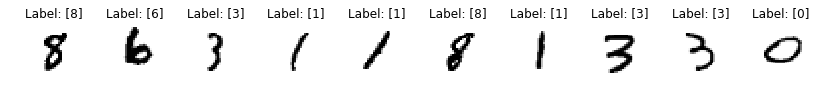

In [20]:
plt.figure(figsize=(14,2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.axis('off')
    plt.imshow(train_X[i].reshape(28,28), cmap='binary')
    plt.title("Label: {0}".format(train_y[i]))
    plt.subplots_adjust(wspace=0.5)
plt.show()

In [21]:
# from tensorflow.examples.tutorials.mnist import input_data
# mnist = input_data.read_data_sets('MNIST_data', one_hot=True)
# mnist = tf.contrib.learn.datasets.load_dataset("mnist")

In [22]:
# (1) INITIALIZATION
K = 200
L = 100
M = 60
N = 30
# Placeholder for input
X = tf.placeholder(tf.float32, [None, 784])
# Placeholder for correct answers
Y_ = tf.placeholder(tf.float32, [None, 10])  # one-hot encoded
# Weights(W) and biases(b)
W1 = tf.Variable( tf.truncated_normal([784, K], stddev=0.1) )
B1 = tf.Variable( tf.zeros([K]) )
W2 = tf.Variable( tf.truncated_normal([K, L], stddev=0.1) )
B2 = tf.Variable( tf.zeros([L]) )
W3 = tf.Variable( tf.truncated_normal([L, M], stddev=0.1) )
B3 = tf.Variable( tf.zeros([M]) )
W4 = tf.Variable( tf.truncated_normal([M, N], stddev=0.1) )
B4 = tf.Variable( tf.zeros([N]) )
W5 = tf.Variable( tf.truncated_normal([N, 10], stddev=0.1) )
B5 = tf.Variable( tf.zeros([10]) )

init = tf.global_variables_initializer()

In [40]:
# (2) SUCCESS METRICS

# Model
X = tf.reshape(X, [-1, 784])  # "-1" means there is only one solution, figure it out.
Y1 = tf.nn.relu( tf.matmul(X, W1) + B1 )
Y2 = tf.nn.relu( tf.matmul(Y1, W2) + B2 )
Y3 = tf.nn.relu( tf.matmul(Y2, W3) + B3 )
Y4 = tf.nn.relu( tf.matmul(Y3, W4) + B4 )
Y = tf.nn.softmax( tf.matmul(Y4, W5) + B5 )
# Loss function
cross_entropy = -tf.reduce_sum(Y_*tf.log(Y))
# cross_entropy = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits_v2(logits=Y, labels=Y_) )
# %age of correct answers found in batch
is_correct = tf.equal(tf.argmax(Y,1), tf.argmax(Y_,1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [41]:
# (3) TRAINING

optimizer = tf.train.GradientDescentOptimizer(0.003)
train_step = optimizer.minimize(cross_entropy)

In [42]:
# sess = tf.Session()
# sess.run(init)

# EPOCH = 100
# BATCH_SIZE = 128
# TRAIN_DATASIZE= train_X.shape[0]
# PERIOD = TRAIN_DATASIZE/BATCH_SIZE #Number of iterations for each epoch
# print(PERIOD)
# cost_history = []
# accu_valid_history = []

# for _ in tqdm(range(EPOCH)):
#     idxs = np.random.permutation(TRAIN_DATASIZE) #shuffled ordering
#     X_random = train_X[idxs]
#     Y_random = train_y_mat[idxs]
#     for i in range(int(PERIOD)):
#         batch_X = X_random[i * BATCH_SIZE:(i+1) * BATCH_SIZE]
#         batch_Y = Y_random[i * BATCH_SIZE:(i+1) * BATCH_SIZE]
#         sess.run(train_step,feed_dict = {X: batch_X, Y_:batch_Y})
        
#     #     success ??
#         c,a = sess.run([cross_entropy, accuracy], feed_dict={X:batch_X, Y_:batch_Y})
#     #     success on test data ??
#         c_valid, a_valid = sess.run([cross_entropy, accuracy], feed_dict={X:valid_X, Y_:valid_y_mat})
#         cost_history.append(c_valid)
#         accu_valid_history.append(a_valid)

#     print("Cost = {0}, Accuracy = {1}%".format(c_valid, round(a_valid*100,2)))

# sess.close()

In [43]:
# (4) RUN
sess = tf.Session()
sess.run(init)
# Run the training step i times on j random images
epoch = 50
batch = 128

start = 0
final = batch
cost_history = []
accu_valid_history = []
# put images into batches and try not to take same image twice until all have been selected
for _ in tqdm(range(epoch)):
    batch_X = train_X[start:final,:] #take set of  images
    batch_Y = train_y_mat[start:final,:] #take set true values
    sess.run(train_step, feed_dict={X: batch_X, Y_:batch_Y}) #run session
    start += batch
    final += batch
    if final >= m_train:
        idxs = np.random.shuffle(np.arange(m_train)) #randomize indices
        train_X = train_X[idxs]
        train_y_mat = train_y_mat[idxs]
        start = 0
        final = batch
    
#     success ??
    c,a = sess.run([cross_entropy, accuracy], feed_dict={X:batch_X, Y_:batch_Y})
#     success on test data ??
    c_valid, a_valid = sess.run([cross_entropy, accuracy], feed_dict={X:valid_X, Y_:valid_y_mat})
    cost_history.append(c_valid)
    accu_valid_history.append(a_valid)

print("Cost = {0}, Accuracy = {1}%".format(c_valid, round(a_valid*100,2)))

sess.close()

100%|██████████| 50/50 [00:07<00:00,  6.91it/s]

Cost = nan, Accuracy = 9.62%


In [46]:
len(cost_history)

50

In [ ]:
plt.figure().patch.set_facecolor('lightgrey')
plt.plot(range(epoch), cost_history, label='cost')
# plt.plot(range(200,epoch,100),cost_history[200::100], label='Cost')
plt.xlabel("iterations")
plt.ylabel("J")
plt.legend()
plt.show()